In [14]:
from QuickInit import *
import numpy as np
import pandas as pd

In [32]:
#One Hot Encode
from sklearn.preprocessing import OneHotEncoder
Sample_data_Pandas=FillNaN_PD('sample/model_sample_SMOTE.csv')
Sample_data_Numpy=FillNaN_NP('sample/model_sample_SMOTE.csv')
enc_data=OneHotEncoder()
ans=enc_data.fit_transform(Sample_data_Numpy)
print(Sample_data_Numpy)
dateframe=pd.DataFrame(Sample_data_Numpy)
dateframe.to_csv('sample/model_sample_OneHotEncode.csv')

sample/model_sample_SMOTE.csv
[[32.  0.  0. ...  2.  2.  0.]
 [29.  0.  0. ...  0.  0.  0.]
 [31.  0.  0. ... 10. 10.  0.]
 ...
 [28.  0.  0. ...  0.  0.  0.]
 [23.  0.  0. ...  7.  1.  0.]
 [35.  0.  0. ...  1.  1.  1.]]


In [ ]:
#数值
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(Sample_data_Pandas)
result=scaler.transform(Sample_data_Pandas)
print(result)


In [ ]:
#StandarLize The Data
from sklearn.preprocessing import StandardScaler
result_=scaler.inverse_transform(result)
scaler_2=StandardScaler()
scaler_2.fit(Sample_data_Pandas)
print(scaler_2)
x_std=scaler_2.transform(result_)
print(result_)

In [21]:
from sklearn.preprocessing import MinMaxScaler
'''scaler = MinMaxScaler()
inputfile='sample/model_sample_SMOTE.csv'
Sample_data_Numpy=FillNaN_NP(inputfile)
scaler = scaler.fit(FillNaN_NP(inputfile))
MMScaler = scaler.transform(Sample_data_Numpy)
from sklearn.preprocessing import StandardScaler
result_ = scaler.inverse_transform(MMScaler)
scaler_2 = StandardScaler()
scaler_2.fit(Sample_data_Numpy)
x_std = scaler_2.transform(result_)
'''
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
x_std=FillNaN_NP('sample/model_sample_SMOTE.csv')
pca_model = PCA(n_components=100).fit(x_std)
x_trainPCA = pca_model.transform(x_std)
print(x_trainPCA.shape)
print(x_trainPCA)

(11017, 100)
[[-3.70948435e+04  2.64865404e+03  7.50992235e+03 ... -2.43274448e+00
   2.15796717e-01  5.21901907e-01]
 [-2.75434158e+04  9.04800014e+02  7.74327824e+03 ... -1.14223779e+00
   2.95721903e-01  2.76087090e-01]
 [-1.59379378e+04 -2.68207558e+03 -6.54579464e+03 ... -5.75399004e-02
   2.16568504e-01  1.49267230e-01]
 ...
 [-4.13161560e+04  2.57815091e+03  1.15062833e+04 ...  3.24779674e-01
   1.32746787e-02 -7.37635024e-02]
 [-4.04465592e+04  2.56826284e+03  8.41325372e+03 ... -8.37050847e-01
   4.56016307e-01  1.61535765e-01]
 [-2.65663515e+04  6.16807446e+02  6.36776462e+03 ...  4.90073633e-01
  -3.36910649e-01  3.97602702e-01]]


PCA component shape: (11017, 100)
PCA component components: [[-3.70948435e+04  2.64865404e+03  7.50992235e+03 ... -2.41140340e+00
   1.95447530e-01 -5.61904160e-01]
 [-2.75434158e+04  9.04800014e+02  7.74327824e+03 ... -1.13637165e+00
   3.13445263e-01 -2.43311134e-01]
 [-1.59379378e+04 -2.68207558e+03 -6.54579464e+03 ... -8.00071327e-02
   1.89664329e-01 -1.01978806e-01]
 ...
 [-4.13161560e+04  2.57815091e+03  1.15062833e+04 ...  3.20580149e-01
   1.00766103e-02  7.77067669e-02]
 [-4.04465592e+04  2.56826284e+03  8.41325372e+03 ... -8.17006782e-01
   5.70931616e-01 -1.18207001e-01]
 [-2.65663515e+04  6.16807446e+02  6.36776462e+03 ...  4.82836254e-01
  -3.43602646e-01 -3.88615829e-01]]


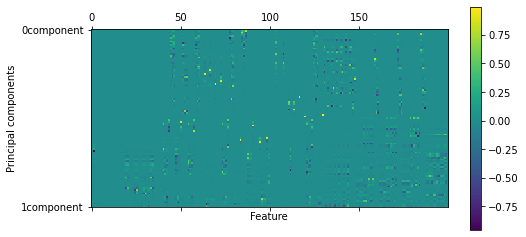

In [42]:
def PCA_EXAMPLE(inputfile,k):
    from sklearn.decomposition import PCA
    x_std = FillNaN_NP(inputfile)#自定义化数据
    pca=PCA(n_components=k)
    pca.fit(x_std)
    x_trainPCA = pca.transform(x_std)
    print("PCA component shape: {}".format(x_trainPCA.shape))
    print("PCA component components: {}".format(x_trainPCA))
    import matplotlib.pyplot as plt
    plt.matshow(pca.components_,cmap='viridis')
    id_EX=[]
    for i in range(k):
        id_EX.append(str(i)+"component")
    plt.yticks([0,k-1],id_EX)
    plt.colorbar()
    plt.xlabel("Feature")
    plt.ylabel("Principal components")
    return x_trainPCA
example=PCA_EXAMPLE('sample/model_sample_SMOTE.csv',100)